In [1]:
import pandas as pd
import numpy as np

In [2]:
x = np.array([-7, 2, -3, -11, 14, 6, 8])

In [3]:
categories = pd.cut(x, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [4]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [5]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [6]:
categories.ordered

True

In [7]:
pd.cut(x, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [8]:
marks=np.array([70, 20, 30, 99, 40, 16, 80 ])

In [10]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [11]:
categories


[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

In [14]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [15]:
enc.fit(marks)   

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [16]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [17]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [18]:
x = [[-21, 41, -14],
    [-13,23,-31],
    [9, 30, -5],
    [0, 24, -17]]

In [19]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [20]:
enc.fit(x)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='quantile')

In [25]:
x_trans = enc.transform(x)
x_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [23]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [26]:
enc.inverse_transform(x_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

In [27]:
automobile_df = pd.read_csv(r'C:\Users\Shaleen\Desktop\jpnb\datasets\auto_mpg_processed.csv')
automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [28]:
X= automobile_df[['Horsepower']]
Y= automobile_df['MPG']

In [30]:
X.sample(10)

,Horsepower
70,150
258,95
97,167
42,72
374,67
310,75
83,137
190,100
30,105
362,92


In [31]:
import matplotlib.pyplot as plt 

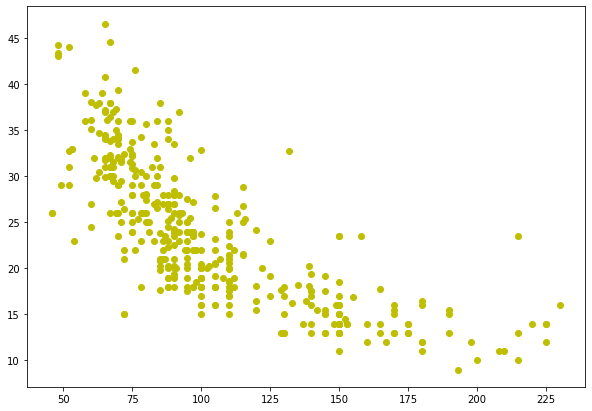

In [32]:
plt.figure(figsize=(10, 7))

plt.plot(X, Y, 'o', c='y')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
reg = LinearRegression().fit(x_train, y_train)

In [37]:
y_pred = reg.predict(x_test)
y_pred

array([25.98385471, 24.57889173, 28.79378067, 29.10599466, 13.18308092,
       24.11057074, 27.70103168, 31.60370662, 24.57889173, 16.30522087,
       11.62201094,  9.59261997, 21.76896578, 28.63767367, 24.89110573,
       24.89110573, 22.54950077, 25.35942672, 27.23271069, 25.67164072,
       24.57889173, 26.29606871, 28.63767367, 15.83689987, 29.26210166,
       25.98385471, 25.98385471, 22.54950077, 32.22813461, 16.30522087,
       25.35942672, 29.57431566, 25.67164072, 26.6082827 , 19.42736082,
       25.98385471, 26.7643897 , 13.9636159 , 12.40254593, 30.35485064,
        4.59719605, 30.04263665, 27.85713868, 24.42278474, 30.35485064,
       22.54950077, 15.99300687,  3.81666107, 15.52468588, 26.6082827 ,
       29.10599466, 28.01324568, 26.13996171, 29.57431566, 24.11057074,
       22.54950077, 23.33003575, 26.4521757 , 28.01324568, 12.40254593,
       28.94988767, 26.4521757 ,  6.15826603, 26.6082827 , 29.10599466,
       32.54034861, 15.05636489, 18.17850484, 30.35485064, 26.45

In [38]:
from sklearn.metrics import r2_score

print('r_2 score:', r2_score(y_test, y_pred))


r_2 score: 0.6252992783647711


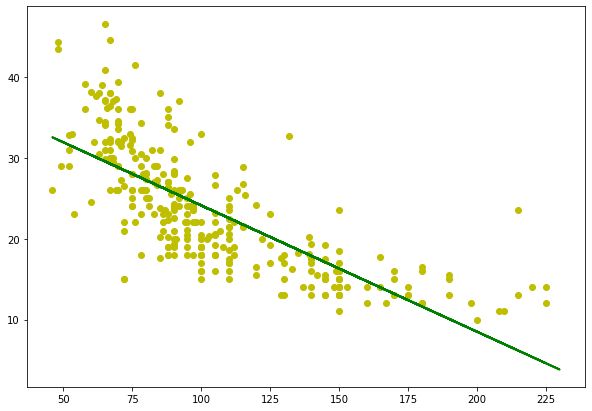

In [39]:
plt.figure(figsize=(10, 7))

plt.plot(x_train, y_train, 'o', c='y')

plt.plot(x_test, y_pred, linewidth=2, color='green',
        linestyle='-', label='linear regression')
plt.show()

In [40]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')
x_binned = enc.fit_transform(x_train)

In [41]:
x_binned[:10]

array([[12.],
       [11.],
       [ 9.],
       [ 3.],
       [ 3.],
       [ 2.],
       [13.],
       [15.],
       [19.],
       [ 9.]])

In [42]:
x_test_binned = enc.transform(x_test)

In [43]:
reg = LinearRegression().fit(x_binned, y_train)

In [44]:
y_pred = reg.predict(x_test_binned)

In [45]:
y_pred

array([25.42755095, 22.2100797 , 30.79000303, 31.86249345, 14.70264678,
       21.13758928, 28.6450222 , 34.00747428, 22.2100797 , 14.70264678,
       13.63015636, 13.63015636, 18.99260845, 30.79000303, 23.28257012,
       23.28257012, 18.99260845, 24.35506053, 27.57253178, 24.35506053,
       22.2100797 , 26.50004137, 30.79000303, 14.70264678, 31.86249345,
       25.42755095, 25.42755095, 18.99260845, 34.00747428, 14.70264678,
       24.35506053, 32.93498387, 24.35506053, 27.57253178, 17.92011803,
       25.42755095, 27.57253178, 14.70264678, 14.70264678, 34.00747428,
       13.63015636, 34.00747428, 28.6450222 , 22.2100797 , 34.00747428,
       18.99260845, 14.70264678, 13.63015636, 14.70264678, 27.57253178,
       31.86249345, 29.71751262, 26.50004137, 32.93498387, 21.13758928,
       18.99260845, 20.06509886, 27.57253178, 29.71751262, 14.70264678,
       31.86249345, 27.57253178, 13.63015636, 27.57253178, 31.86249345,
       34.00747428, 14.70264678, 17.92011803, 34.00747428, 27.57

In [46]:
r2_score(y_test, y_pred)

0.724599193294483

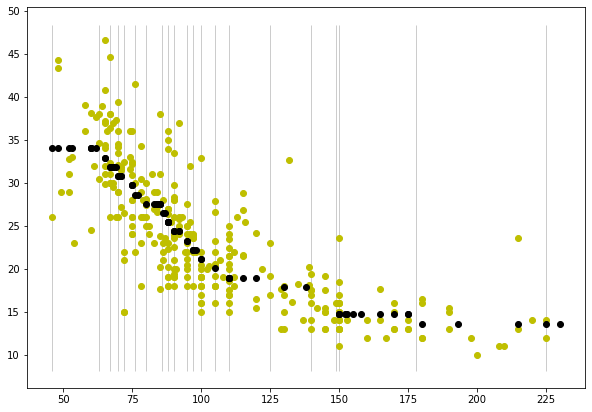

In [47]:
plt.figure(figsize=(10, 7))

plt.plot(x_train, y_train, 'o', c='y')
plt.plot(x_test, y_pred, 'o', c='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
plt.show()